In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# reading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# preparing data
y_train = train["label"]
x_train = train.iloc[:,1:]
x_train = x_train / 255.0  # data range [0, 1]
x_test = test / 255.0      # data range [0, 1]
x_train = x_train.values.reshape(-1,28,28,1)   # input image dimensions: 28*28*1
x_test = x_test.values.reshape(-1,28,28,1)
#y_train = keras.utils.to_categorical(y_train, num_classes = 10)  # convert a class vector (integers) to binary class matrix
print('training data shape', x_train.shape)
print('testing data shape', x_test.shape)
print('training result shape', y_train.shape)
print('training result example', y_train[0])

training data shape (42000, 28, 28, 1)
testing data shape (28000, 28, 28, 1)
training result shape (42000,)
training result example 1


<BarContainer object of 10 artists>

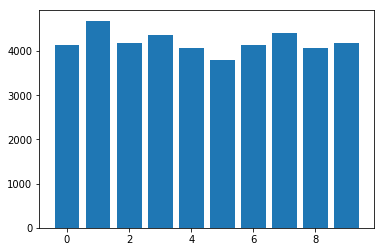

In [7]:
# check if labels are equally distributed, if not, weights should be assigned
plt.bar(y_train.value_counts().index, y_train.value_counts().values)

<Figure size 1080x360 with 0 Axes>

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

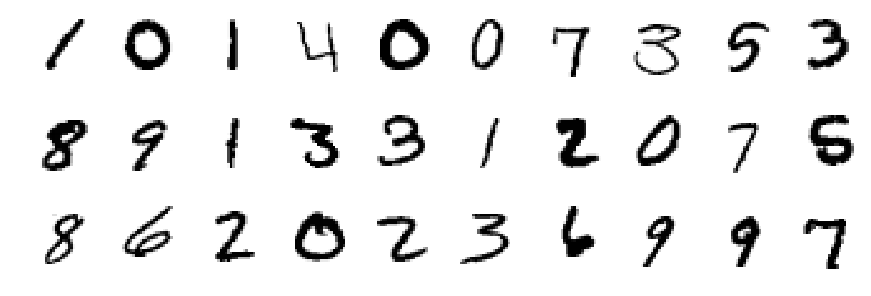

In [8]:
# preview some images
plt.figure(figsize=(15,5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(x_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')

In [9]:
# preparing training and testing data for model validation
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1)

In [10]:
# create cnn model architecture
def cnn_model(optimizer = 'Adam', pool_size = 2, dropout = 0.3, activation = 'relu'):
    
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=3, activation=activation, input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (3, 3), activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(dropout))

    model.add(Conv2D(filters=32, kernel_size=3, activation=activation))
    model.add(BatchNormalization())
    model.add(Conv2D(32, 3, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(dropout))

    model.add(Conv2D(filters=64, kernel_size=3, activation=activation))
    model.add(BatchNormalization())
    model.add(Conv2D(64, 3, padding = 'same', activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(128, activation=activation)) 
    model.add(Dropout(dropout))
    model.add(Dense(512, activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
    return model

In [9]:
# choosing optimization algorithms
batch_size = 128
epochs = 20
num_classes = 10
optimizer = 'Adam'
pool_size = 2
dropout = 0.3
activation = 'relu'

clf = KerasClassifier(build_fn=cnn_model, batch_size=batch_size, epochs=epochs, \
                      verbose=1,optimizer=optimizer,pool_size=pool_size,dropout=dropout,activation=activation)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 343.3min finished


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
37800/37800 [==============================] - 106s 3ms/step - loss: 0.6795 - acc: 0.7730
Epoch 2/20
37800/37800 [==============================] - 103s 3ms/step - loss: 0.1532 - acc: 0.9547
Epoch 3/20
37800/37800 [==============================] - 103s 3ms/step - loss: 0.1076 - acc: 0.9692
Epoch 4/20
37800/37800 [==============================] - 100s 3ms/step - loss: 0.0810 - acc: 0.9770
Epoch 5/20
37800/37800 [==============================] - 104s 3ms/step - loss: 0.0698 - acc: 0.9807
Epoch 6/20
37800/37800 [==============================] - 103s 3ms/step - loss: 0.0631 - acc: 0.9820
Epoch 7/20
37800/37800 [==============================] - 103s 3ms/step - loss: 0.0557 - acc: 0.9840
Epoch 8/20
37800/37800 [==============================] - 

In [10]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.991296 using {'optimizer': 'Adam'}
0.985767 (0.000714) with: {'optimizer': 'SGD'}
0.990582 (0.001673) with: {'optimizer': 'RMSprop'}
0.990476 (0.000405) with: {'optimizer': 'Adagrad'}
0.991085 (0.000491) with: {'optimizer': 'Adadelta'}
0.991296 (0.000944) with: {'optimizer': 'Adam'}
0.991138 (0.001722) with: {'optimizer': 'Adamax'}
0.990185 (0.000551) with: {'optimizer': 'Nadam'}


In [28]:
# tuning pool size
batch_size = 128
epochs = 20
num_classes = 10
optimizer = "Adam"
pool_size = 2
activation = 'relu'

clf = KerasClassifier(build_fn=cnn_model, batch_size=batch_size, epochs=epochs, \
                      verbose=1,optimizer=optimizer,pool_size=pool_size,activation=activation)

pool_size = [1,2]

param_grid = dict(pool_size=pool_size)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 237.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 237.4min finished


Epoch 1/20
37800/37800 [==============================] - 84s 2ms/step - loss: 0.6599 - acc: 0.7795
Epoch 2/20
37800/37800 [==============================] - 80s 2ms/step - loss: 0.1380 - acc: 0.9601
Epoch 3/20
37800/37800 [==============================] - 81s 2ms/step - loss: 0.0975 - acc: 0.9717
Epoch 4/20
37800/37800 [==============================] - 79s 2ms/step - loss: 0.0773 - acc: 0.9783
Epoch 5/20
37800/37800 [==============================] - 86s 2ms/step - loss: 0.0700 - acc: 0.9804
Epoch 6/20
37800/37800 [==============================] - 75s 2ms/step - loss: 0.0577 - acc: 0.9837
Epoch 7/20
37800/37800 [==============================] - 75s 2ms/step - loss: 0.0569 - acc: 0.9842
Epoch 8/20
37800/37800 [==============================] - 75s 2ms/step - loss: 0.0493 - acc: 0.9858
Epoch 9/20
37800/37800 [==============================] - 75s 2ms/step - loss: 0.0452 - acc: 0.9867
Epoch 10/20
37800/37800 [==============================] - 76s 2ms/step - loss: 0.0443 - acc: 0.9877

In [29]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.989762 using {'pool_size': 2}
0.986852 (0.002669) with: {'pool_size': 1}
0.989762 (0.001557) with: {'pool_size': 2}


In [12]:
# tuning dropout
batch_size = 128
epochs = 20
num_classes = 10
optimizer = 'Adam'
pool_size = 2
dropout = 0.3
activation = 'relu'

clf = KerasClassifier(build_fn=cnn_model, batch_size=batch_size, epochs=epochs, \
                      verbose=1,optimizer=optimizer,pool_size=pool_size,dropout=dropout,activation=activation)

dropout = [0.1, 0.2, 0.3, 0.4, 0.5]

param_grid = dict(dropout = dropout)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Instructions for updating:
Colocations handled automatically by placer.


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 176.5min finished


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
37800/37800 [==============================] - 74s 2ms/step - loss: 0.6541 - acc: 0.7806
Epoch 2/20
37800/37800 [==============================] - 73s 2ms/step - loss: 0.1380 - acc: 0.9613
Epoch 3/20
37800/37800 [==============================] - 73s 2ms/step - loss: 0.0996 - acc: 0.9722
Epoch 4/20
37800/37800 [==============================] - 72s 2ms/step - loss: 0.0858 - acc: 0.9764
Epoch 5/20
37800/37800 [==============================] - 72s 2ms/step - loss: 0.0690 - acc: 0.9807
Epoch 6/20
37800/37800 [==============================] - 73s 2ms/step - loss: 0.0619 - acc: 0.9826
Epoch 7/20
37800/37800 [==============================] - 73s 2ms/step - loss: 0.0577 - acc: 0.9838
Epoch 8/20
37800/37800 [==============================] - 73s 2ms/step - loss: 0.0483 - acc: 0.9860
Epoch 9/20
37800/37800 [=============

In [13]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.990794 using {'dropout': 0.3}
0.988968 (0.001265) with: {'dropout': 0.1}
0.989921 (0.000877) with: {'dropout': 0.2}
0.990794 (0.001139) with: {'dropout': 0.3}
0.989286 (0.002103) with: {'dropout': 0.4}
0.990423 (0.000699) with: {'dropout': 0.5}


In [68]:
# tune activation function
batch_size = 128
epochs = 10
num_classes = 10
optimizer = 'Adam'
pool_size = 2
dropout = 0.3
activation = 'relu'

clf = KerasClassifier(build_fn=cnn_model, batch_size=batch_size, epochs=epochs, \
                      verbose=1,optimizer=optimizer,pool_size=pool_size,dropout=dropout,activation=activation)

activation = ['relu','softplus']

param_grid = dict(activation = activation)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/Users/Sybil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 41.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 41.6min finished


Epoch 1/10
37800/37800 [==============================] - 90s 2ms/step - loss: 0.5707 - acc: 0.8119
Epoch 2/10
37800/37800 [==============================] - 85s 2ms/step - loss: 0.1293 - acc: 0.9625
Epoch 3/10
37800/37800 [==============================] - 85s 2ms/step - loss: 0.0887 - acc: 0.9743
Epoch 4/10
37800/37800 [==============================] - 84s 2ms/step - loss: 0.0745 - acc: 0.9781
Epoch 5/10
37800/37800 [==============================] - 82s 2ms/step - loss: 0.0660 - acc: 0.9810
Epoch 6/10
37800/37800 [==============================] - 83s 2ms/step - loss: 0.0566 - acc: 0.9836
Epoch 7/10
37800/37800 [==============================] - 83s 2ms/step - loss: 0.0547 - acc: 0.9840
Epoch 8/10
37800/37800 [==============================] - 83s 2ms/step - loss: 0.0457 - acc: 0.9858
Epoch 9/10
37800/37800 [==============================] - 83s 2ms/step - loss: 0.0424 - acc: 0.9878
Epoch 10/10
37800/37800 [==============================] - 83s 2ms/step - loss: 0.0443 - acc: 0.9871

In [69]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.989603 using {'activation': 'softplus'}
0.988095 (0.002185) with: {'activation': 'relu'}
0.989603 (0.001430) with: {'activation': 'softplus'}


In [63]:
Y_train = keras.utils.to_categorical(Y_train, num_classes = 10)
Y_val = keras.utils.to_categorical(Y_val, num_classes = 10)

In [114]:
# fit the final model  
finalCNN = cnn_model(optimizer = 'Adam', pool_size = 2, dropout = 0.3, activation = 'softplus')

CNN = finalCNN.fit(X_train, Y_train,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(X_val, Y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/100
37800/37800 [==============================] - 102s 3ms/step - loss: 0.6588 - acc: 0.7862 - val_loss: 0.0783 - val_acc: 0.9743
Epoch 2/100
37800/37800 [==============================] - 107s 3ms/step - loss: 0.1395 - acc: 0.9581 - val_loss: 0.0521 - val_acc: 0.9831
Epoch 3/100
37800/37800 [==============================] - 112s 3ms/step - loss: 0.1000 - acc: 0.9707 - val_loss: 0.0263 - val_acc: 0.9907
Epoch 4/100
37800/37800 [==============================] - 120s 3ms/step - loss: 0.0790 - acc: 0.9762 - val_loss: 0.0293 - val_acc: 0.9912
Epoch 5/100
37800/37800 [==============================] - 100s 3ms/step - loss: 0.0664 - acc: 0.9810 - val_loss: 0.0236 - val_acc: 0.9921
Epoch 6/100
37800/37800 [==============================] - 105s 3ms/step - loss: 0.0578 - acc: 0.9825 - val_loss: 0.0217 - val_acc: 0.9936
Epoch 7/100
37800/37800 [==============================] - 94s 2ms/step - loss: 0.0550 - acc: 0.9835 - val_loss: 0.01

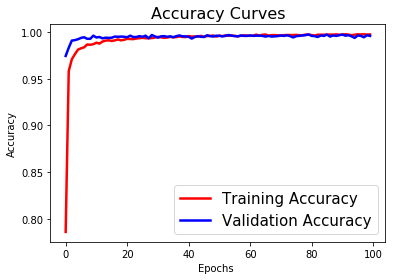

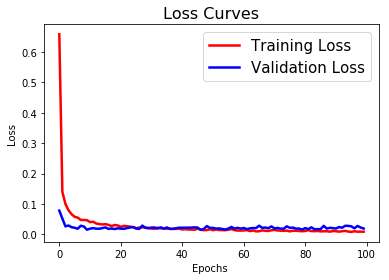

In [115]:
# plot the accuracy & loss vs epochs
def plot_loss_accuracy(history):
    plt.figure()
    epochs = range(len(history.epoch))
    plt.plot(epochs, history.history['acc'], 'r', linewidth=2.5)
    plt.plot(epochs,history.history['val_acc'], 'b', linewidth=2.5)
    plt.xlabel('Epochs ',fontsize=10)
    plt.ylabel('Accuracy',fontsize=10)
    plt.title('Accuracy Curves',fontsize=16)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
    
    plt.figure()
    plt.plot(epochs, history.history['loss'], 'r', linewidth=2.5)
    plt.plot(epochs,history.history['val_loss'], 'b', linewidth=2.5)
    plt.xlabel('Epochs ',fontsize=10)
    plt.ylabel('Loss',fontsize=10)
    plt.title('Loss Curves',fontsize=16)
    plt.legend(['Training Loss', 'Validation Loss'],fontsize=15)
    
    plt.show()
    
plot_loss_accuracy(CNN)

In [116]:
# Evaluation
score = finalCNN.evaluate(X_val, Y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.0191530133523534
Val accuracy: 0.9957142857142857


In [117]:
# confusion_matrix
Y_model = finalCNN.predict(X_val)
Y_pred = np.argmax(Y_model, axis=1)
Y_true = np.argmax(Y_val, axis=1)
confusion_matrix(Y_true, Y_pred)

array([[428,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 436,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0, 419,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 445,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0, 378,   0,   1,   0,   0,   1],
       [  0,   0,   0,   0,   0, 413,   0,   0,   1,   1],
       [  0,   0,   1,   0,   1,   0, 435,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 447,   1,   0],
       [  0,   2,   1,   0,   0,   0,   1,   0, 387,   0],
       [  2,   0,   0,   0,   2,   0,   0,   0,   0, 394]])

In [118]:
# other metrics
print('Precision Score:',precision_score(Y_true, Y_pred, average='weighted'))
print('Recall Score:',recall_score(Y_true, Y_pred,average='weighted'))
print('F1 Score:',f1_score(Y_true, Y_pred,average='weighted'))

Precision Score: 0.9957212255326522
Recall Score: 0.9957142857142857
F1 Score: 0.9957151831419324


In [119]:
# model prediction 
y_test = finalCNN.predict(x_test, batch_size=128)
y_res = np.argmax(y_test,axis=1)

# write results to csv file
results = pd.Series(y_res,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("CNN_100.csv",index=False)

In [121]:
# try data augmentation to see if there is any further improvement
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  
datagen.fit(X_train)

CNNwithDA = finalCNN.fit_generator(datagen.flow(X_train,Y_train, batch_size=128),
                              epochs = 100, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // 128)

Epoch 1/100
295/295 [==============================] - 105s 354ms/step - loss: 0.1238 - acc: 0.9683 - val_loss: 0.0261 - val_acc: 0.9938
Epoch 2/100
295/295 [==============================] - 120s 406ms/step - loss: 0.0834 - acc: 0.9782 - val_loss: 0.0198 - val_acc: 0.9948
Epoch 3/100
295/295 [==============================] - 118s 398ms/step - loss: 0.0706 - acc: 0.9805 - val_loss: 0.0177 - val_acc: 0.9943
Epoch 4/100
295/295 [==============================] - 96s 326ms/step - loss: 0.0652 - acc: 0.9821 - val_loss: 0.0171 - val_acc: 0.9943
Epoch 5/100
295/295 [==============================] - 90s 307ms/step - loss: 0.0632 - acc: 0.9826 - val_loss: 0.0175 - val_acc: 0.9943
Epoch 6/100
295/295 [==============================] - 910s 3s/step - loss: 0.0624 - acc: 0.9828 - val_loss: 0.0184 - val_acc: 0.9940
Epoch 7/100
295/295 [==============================] - 93s 314ms/step - loss: 0.0552 - acc: 0.9840 - val_loss: 0.0140 - val_acc: 0.9960
Epoch 8/100
295/295 [==========================

Epoch 61/100
295/295 [==============================] - 96s 326ms/step - loss: 0.0338 - acc: 0.9903 - val_loss: 0.0120 - val_acc: 0.9955
Epoch 62/100
295/295 [==============================] - 95s 321ms/step - loss: 0.0304 - acc: 0.9912 - val_loss: 0.0117 - val_acc: 0.9964
Epoch 63/100
295/295 [==============================] - 93s 317ms/step - loss: 0.0298 - acc: 0.9917 - val_loss: 0.0116 - val_acc: 0.9952
Epoch 64/100
295/295 [==============================] - 107s 363ms/step - loss: 0.0293 - acc: 0.9916 - val_loss: 0.0095 - val_acc: 0.9967
Epoch 65/100
295/295 [==============================] - 91s 309ms/step - loss: 0.0299 - acc: 0.9914 - val_loss: 0.0098 - val_acc: 0.9962
Epoch 66/100
295/295 [==============================] - 93s 314ms/step - loss: 0.0320 - acc: 0.9910 - val_loss: 0.0120 - val_acc: 0.9960
Epoch 67/100
295/295 [==============================] - 95s 321ms/step - loss: 0.0294 - acc: 0.9914 - val_loss: 0.0101 - val_acc: 0.9971
Epoch 68/100
295/295 [==================

In [76]:
#historydf = pd.DataFrame(CNNwithDA.history, index=CNNwithDA.epoch)

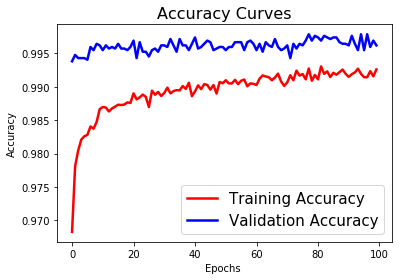

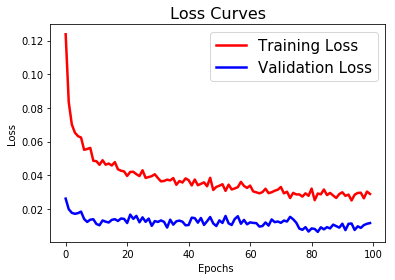

In [122]:
# plot the accuracy & loss vs epochs
plot_loss_accuracy(CNNwithDA)

In [123]:
# Evaluation
score = finalCNN.evaluate(X_val, Y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])
# confusion_matrix
Y_model = finalCNN.predict(X_val)
Y_pred = np.argmax(Y_model, axis=1)
Y_true = np.argmax(Y_val, axis=1)
confusion_matrix(Y_true, Y_pred)
# other metrics
print('Precision Score:',precision_score(Y_true, Y_pred, average='weighted'))
print('Recall Score:',recall_score(Y_true, Y_pred,average='weighted'))
print('F1 Score:',f1_score(Y_true, Y_pred,average='weighted'))

Val loss: 0.011609445702134898
Val accuracy: 0.9961904761904762


array([[426,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 435,   1,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0, 420,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 446,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 379,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0, 413,   2,   0,   0,   0],
       [  0,   0,   1,   0,   1,   0, 435,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 446,   0,   1],
       [  0,   1,   1,   0,   0,   0,   2,   0, 387,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0, 397]])

Precision Score: 0.9962157484251535
Recall Score: 0.9961904761904762
F1 Score: 0.9961947248178707


In [124]:
# model prediction 
y_test = finalCNN.predict(x_test, batch_size=128)
y_res = np.argmax(y_test,axis=1)

In [125]:
# write results to csv file
results = pd.Series(y_res,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("CNN_100_withDA.csv",index=False)